<a href="https://colab.research.google.com/github/Mo427-Ashraf/1strepo/blob/main/phase2%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3
!pip install shimmy>=2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy

env = gym.make("FrozenLake-v1", is_slippery=True)
env = Monitor(env)

model = DQN('MlpPolicy', env, verbose=0)

In [3]:
timesteps = [10_000, 25_000, 50_000, 75_000, 100_000, 150_000, 200_000]
results = []

for t in timesteps:
  print(f"Timestep value: {t}.")
  model.learn(total_timesteps=t)

  mean_reward, std_reward = evaluate_policy(model , env, n_eval_episodes= 10)
  results.append((t,mean_reward,std_reward))
  print(f"\nStep: {t}\nMean Reward= {mean_reward}\nStd Reward= {std_reward}\n")

Timestep value: 10000.

Step: 10000
Mean Reward= 0.3
Std Reward= 0.45825756949558405

Timestep value: 25000.

Step: 25000
Mean Reward= 0.0
Std Reward= 0.0

Timestep value: 50000.

Step: 50000
Mean Reward= 0.6
Std Reward= 0.48989794855663565

Timestep value: 75000.

Step: 75000
Mean Reward= 0.9
Std Reward= 0.30000000000000004

Timestep value: 100000.

Step: 100000
Mean Reward= 0.7
Std Reward= 0.45825756949558394

Timestep value: 150000.

Step: 150000
Mean Reward= 0.9
Std Reward= 0.30000000000000004

Timestep value: 200000.

Step: 200000
Mean Reward= 0.7
Std Reward= 0.45825756949558405



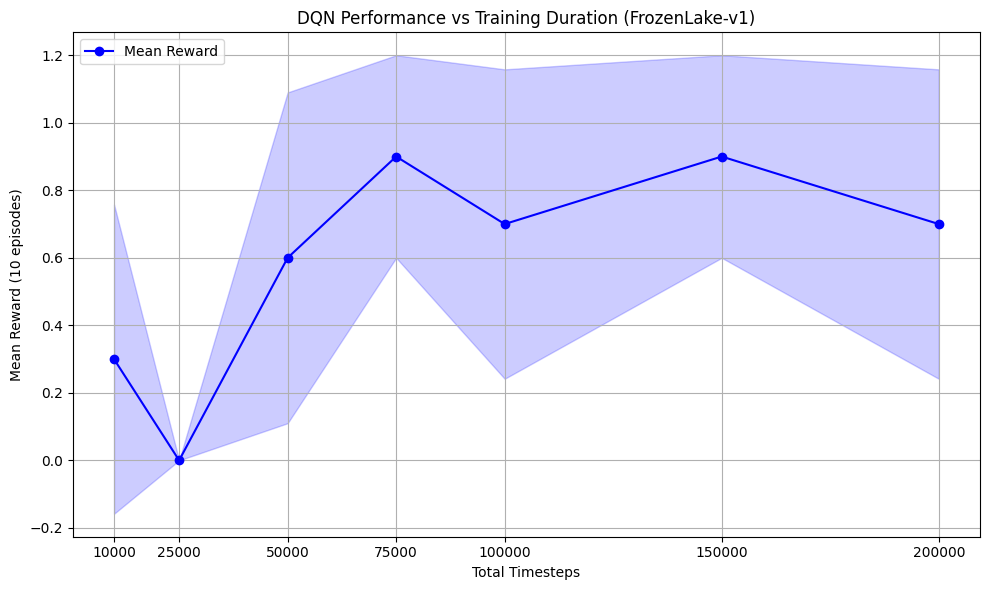

Optimal timesteps: 75000 (Mean reward: 0.90)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data from results
timesteps_values = [r[0] for r in results]
mean_rewards = [r[1] for r in results]
std_rewards = [r[2] for r in results]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(timesteps_values, mean_rewards, 'b-o', label='Mean Reward')
plt.fill_between(timesteps_values,
                 np.array(mean_rewards) - np.array(std_rewards),
                 np.array(mean_rewards) + np.array(std_rewards),
                 alpha=0.2, color='blue')

# Customize the plot
plt.title('DQN Performance vs Training Duration (FrozenLake-v1)')
plt.xlabel('Total Timesteps')
plt.ylabel('Mean Reward (10 episodes)')
plt.xticks(timesteps_values)
plt.grid(True)
plt.legend()

# Display and save
plt.tight_layout()
plt.savefig('frozenlake_training_curve.png')
plt.show()

# Determine optimal timesteps (bonus)
best_idx = np.argmax(mean_rewards)
optimal_timesteps = timesteps_values[best_idx]
print(f"Optimal timesteps: {optimal_timesteps} (Mean reward: {mean_rewards[best_idx]:.2f})")